# Analyse von PC-Komponenten (Datenquelle: newegg.com)

# Library importieren

In [1]:
#import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.cluster import KMeans


# Laden von Daten aus CSV-Datei

In [2]:
dataset = pd.read_csv("BigData.csv", encoding="latin-1", dtype=str)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698 entries, 0 to 2697
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ï»¿Number     2698 non-null   object
 1   Brand         2698 non-null   object
 2   Product_Name  2698 non-null   object
 3   Prices        2414 non-null   object
 4   Category      2698 non-null   object
dtypes: object(5)
memory usage: 105.5+ KB


In [3]:
dataset.head(5)

,ï»¿Number,Brand,Product_Name,Prices,Category
0,1,AMD,AMD Ryzen Threadripper 3990X 64-Core 2.9 GHz S...,"1,588.99",CPU
1,2,AMD,AMD Desktop Ryzen 5 1600 65W AM4 Processor wit...,"1,323.99",CPU
2,3,AMD,AMD Ryzen 9 3950X 16-Core 3.5 GHz Socket AM4 1...,812.99,CPU
3,4,AMD,AMD RYZEN 5 3600 6-Core 3.6 GHz (4.2 GHz Max B...,"1,134.99",CPU
4,5,AMD,AMD RYZEN 9 3900X 12-Core 3.8 GHz (4.6 GHz Max...,"7,253.99",CPU


# Label Price sauber machen und ändern die Datei nach float

In [4]:
dataset.Prices = dataset.Prices.str.replace(",","")
dataset.Prices = dataset.Prices.astype(float)

In [5]:
print("length of dataset before drop of column Price:", len(dataset))
dataset.dropna(thresh=1, subset=["Prices"], inplace=True)
print("length of dataset after drop of column Price:", len(dataset))

length of dataset before drop of column Price: 2698
length of dataset after drop of column Price: 2414


# Spalte hinzufügen, um Sequenzen zu erstellen

In [6]:
dataset["seq"] = [i for i in range(len(dataset.Brand))]
dataset[:5]

,ï»¿Number,Brand,Product_Name,Prices,Category,seq
0,1,AMD,AMD Ryzen Threadripper 3990X 64-Core 2.9 GHz S...,1588.99,CPU,0
1,2,AMD,AMD Desktop Ryzen 5 1600 65W AM4 Processor wit...,1323.99,CPU,1
2,3,AMD,AMD Ryzen 9 3950X 16-Core 3.5 GHz Socket AM4 1...,812.99,CPU,2
3,4,AMD,AMD RYZEN 5 3600 6-Core 3.6 GHz (4.2 GHz Max B...,1134.99,CPU,3
4,5,AMD,AMD RYZEN 9 3900X 12-Core 3.8 GHz (4.6 GHz Max...,7253.99,CPU,4


In [7]:
dataset.seq

0          0
1          1
2          2
3          3
4          4
        ... 
2673    2409
2674    2410
2675    2411
2676    2412
2677    2413
Name: seq, Length: 2414, dtype: int64

# Häufigkeit jedes Brand in allen Kategorien

<AxesSubplot:title={'center':'Brand Count'}>

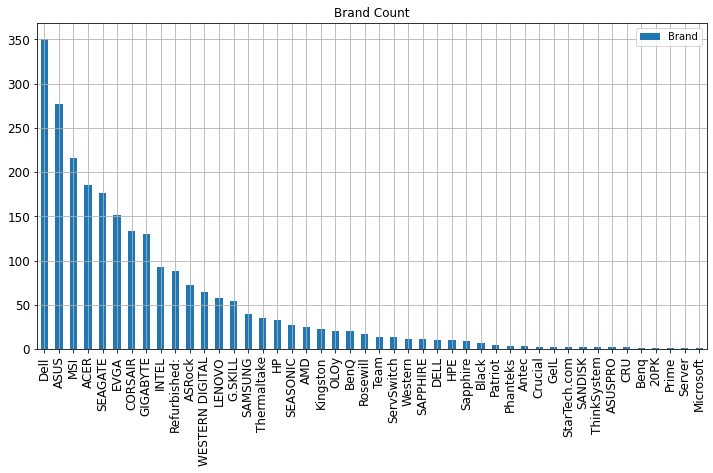

In [8]:
Count = dataset["Brand"].value_counts()
#other_brand_list = brand[brand.seq < 30].Brand

# plot Brand Average Price
Count.plot(
    x='Brand',
    y='Count',
    kind="bar",
    figsize=(12,6),
    use_index=True,
    title='Brand Count',
    grid=True,
    legend=True,
    fontsize=12,
    colormap=None,
)

# Anzahl der Produkte für jede Kategorie

<AxesSubplot:title={'center':'Product pro Category Count'}>

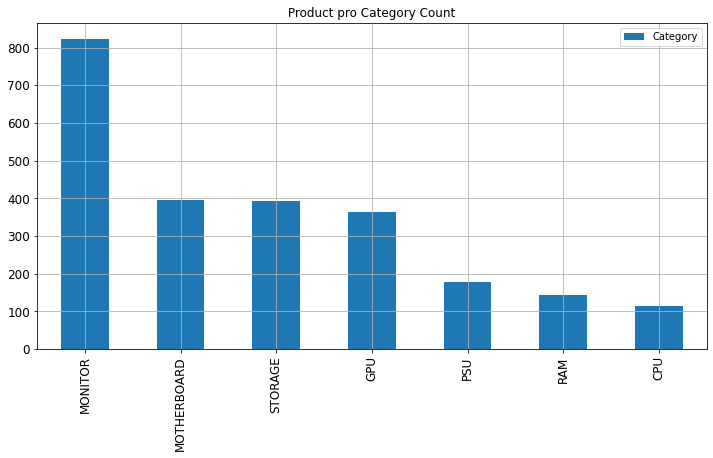

In [9]:
Category = dataset["Category"].value_counts()
# plot Brand Average Price
Category.plot(
    x='Category',
    y='Count',
    kind="bar",
    figsize=(12,6),
    use_index=True,
    title='Product pro Category Count',
    grid=True,
    legend=True,
    fontsize=12,
    colormap=None,
)

# Preisdurchschnitt für jedes Brand

<AxesSubplot:title={'center':'Brand Average Price'}>

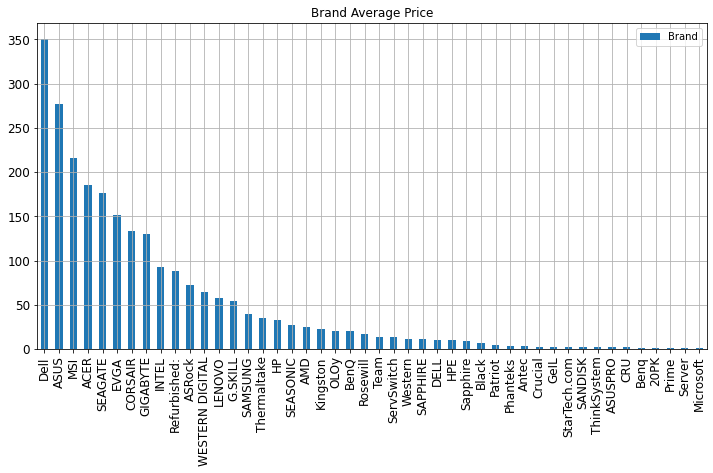

In [10]:

Count.plot(
    x='Brand',
    y='Prices',
    kind="bar",
    figsize=(12,6),
    use_index=True,
    title='Brand Average Price',
    grid=True,
    legend=True,
    fontsize=12,
    colormap=None,
)

# Definieren Value per Brand (Alle Kategorien)

In [11]:
brand = dataset.groupby(by="Brand", as_index=False).agg({"seq": pd.Series.nunique})
brand.seq.sum()
brand[brand.seq >= 30]
check = dataset.groupby("Brand", as_index=False)["Prices"].mean()
v = check[check.Brand.isin([i for i in brand.Brand])]
v = v.sort_values(by="Prices")
v["Value"] = v.Prices / np.mean(v.Prices)
v.drop(columns="Prices")

,Brand,Value
29,Prime,0.232527
0,20PK,0.366560
39,Server,0.375674
36,SEASONIC,0.383150
18,GeIL,0.425072
33,SANDISK,0.433209
6,Antec,0.445415
42,Thermaltake,0.469855
12,Crucial,0.494950
41,Team,0.497367


# Scattern von Produktpreisen

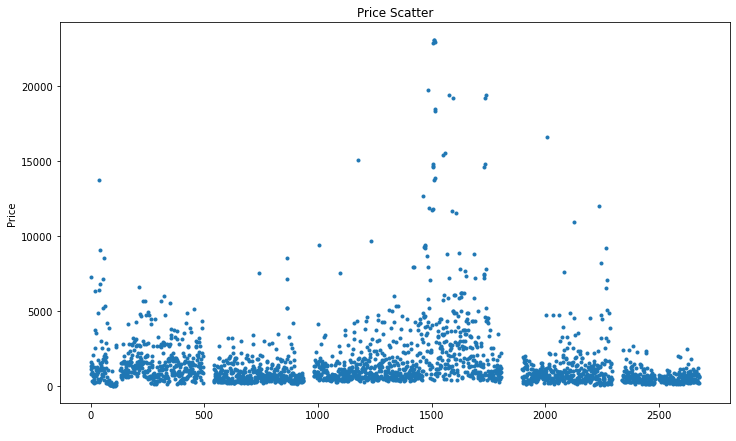

In [12]:
plt.figure(figsize=(12,7))
plt.xlabel('Product')
plt.ylabel('Price')
plt.title('Price Scatter')
plt.plot(dataset.Prices, '.', alpha = 1)

# Neue Dataframe für Brand von einzelnen Kategorien

In [13]:
df = dataset.drop('Product_Name', 1)
df

,ï»¿Number,Brand,Prices,Category,seq
0,1,AMD,1588.99,CPU,0
1,2,AMD,1323.99,CPU,1
2,3,AMD,812.99,CPU,2
3,4,AMD,1134.99,CPU,3
4,5,AMD,7253.99,CPU,4
...,...,...,...,...,...
2673,175,CORSAIR,1199.40,PSU,2409
2674,176,Thermaltake,210.10,PSU,2410
2675,177,Thermaltake,635.18,PSU,2411
2676,178,CORSAIR,634.90,PSU,2412


# Erstellen Index für Brand einzelnen Kategorien

In [14]:
CPU = (df.loc[df['Category'].isin(['CPU'])])
Motherboard = (df.loc[df['Category'].isin(['MOTHERBOARD'])])
GPU= (df.loc[df['Category'].isin(['GPU'])])
Storage = (df.loc[df['Category'].isin(['STORAGE'])])
PSU = (df.loc[df['Category'].isin(['PSU'])])

# Rechnen Value

# Kategorie : CPU

In [15]:
brand1 = CPU.groupby(by="Brand", as_index=False).agg({"seq": pd.Series.nunique})
brand1.seq.sum()
check1 = CPU.groupby("Brand", as_index=False)["Prices"].mean()
v1 = check1[check1.Brand.isin([x for x in brand.Brand])]
v1 = v1.sort_values(by="Prices")
v1["Value"] = v1.Prices / np.mean(v1.Prices)
cpu = v1.drop(columns="Prices")
cpu

,Brand,Value
4,Refurbished:,0.221412
3,Kingston,0.715154
2,INTEL,0.745943
0,AMD,1.313639
1,CORSAIR,2.003851


# Kategorie : MotherBoard

In [16]:
brand2 = Motherboard.groupby(by="Brand", as_index=False).agg({"seq": pd.Series.nunique})
brand2.seq.sum()
check2 = Motherboard.groupby("Brand", as_index=False)["Prices"].mean()
v2 = check2[check2.Brand.isin([x for x in brand.Brand])]
v2 = v2.sort_values(by="Prices")
v2["Value"] = v2.Prices / np.mean(v2.Prices)
mobo = v2.drop(columns="Prices")
mobo

,Brand,Value
8,Prime,0.344308
10,Server,0.556270
9,Refurbished:,0.706784
5,INTEL,0.806623
3,EVGA,0.908168
1,ASUS,0.997815
7,MSI,1.006462
0,ASRock,1.014093
4,GIGABYTE,1.085055
2,CORSAIR,1.669980


# Kategorie : GPU

In [17]:
brand3 = GPU.groupby(by="Brand", as_index=False).agg({"seq": pd.Series.nunique})
brand3.seq.sum()
check3 = GPU.groupby("Brand", as_index=False)["Prices"].mean()
v3 = check3[check3.Brand.isin([x for x in brand.Brand])]
v3 = v3.sort_values(by="Prices")
v3["Value"] = v3.Prices / np.mean(v3.Prices)
gpu = v3.drop(columns="Prices")
gpu

,Brand,Value
8,SAPPHIRE,0.736380
5,Kingston,0.838586
7,Refurbished:,0.896479
4,GIGABYTE,0.907364
2,CORSAIR,0.961362
6,MSI,0.980528
9,Sapphire,1.084840
1,ASUS,1.147592
3,EVGA,1.194163
0,ASRock,1.252706


# Kategorie : Storage

In [18]:
brand4 = Storage.groupby(by="Brand", as_index=False).agg({"seq": pd.Series.nunique})
brand4.seq.sum()
check4 = Storage.groupby("Brand", as_index=False)["Prices"].mean()
v4 = check4[check4.Brand.isin([x for x in brand.Brand])]
v4 = v4.sort_values(by="Prices")
v4["Value"] = v4.Prices / np.mean(v4.Prices)
St = v4.drop(columns="Prices")
St

,Brand,Value
10,Refurbished:,0.188287
0,20PK,0.412200
12,SANDISK,0.487146
3,CRU,0.605057
9,Microsoft,0.610025
4,DELL,0.769669
11,SAMSUNG,0.777486
13,SEAGATE,0.838880
14,ServSwitch,0.952575
15,StarTech.com,0.986502


# Kategorie : PSU

In [19]:
brand5 = PSU.groupby(by="Brand", as_index=False).agg({"seq": pd.Series.nunique})
brand5.seq.sum()
check5 = PSU.groupby("Brand", as_index=False)["Prices"].mean()
v5 = check5[check1.Brand.isin([x for x in brand.Brand])]
v5 = v5.sort_values(by="Prices")
v5["Value"] = v5.Prices / np.mean(v5.Prices)
psu = v5.drop(columns="Prices")
psu


,Brand,Value
0,CORSAIR,0.844302
3,SEASONIC,0.913719
1,EVGA,0.966778
2,Rosewill,1.118216
4,Thermaltake,1.156985
